Library

In [1]:
#library function: pandas, numpy used for large data
import pandas as pd
import numpy as np

#library func for trees
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #import Decision Tree classifier
from sklearn.model_selection import train_test_split #for dataset split into train-test
from sklearn.metrics import accuracy_score #library for accuracy calculate

#DT tree visualization
import collections
from PIL import Image
#following imports are needed for ploting the tree
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

from matplotlib import pyplot as plt
import seaborn as sns

import graphviz
import io

from scipy import misc

from sklearn.naive_bayes import GaussianNB #import Naive Bayes classifier
from sklearn.ensemble import RandomForestClassifier #import Random Forest classifier
from sklearn.svm import SVC #import SVM classifier
from sklearn.linear_model import LogisticRegression #import Logistic Regression classifier
from sklearn.neighbors import KNeighborsClassifier # import K Nearest Neighbors classifier
from sklearn.ensemble import GradientBoostingClassifier #import Gradient Boosting classifier

%matplotlib inline


Mount google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')
#data=pd.read_csv(r"F:\Study\11th Semester\CSE366(3)\Project\heart-attack.csv")

Mounted at /content/drive


Import dataset

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart-attack.csv')

Check dataset

In [ ]:
data.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [ ]:
data.info() #check null & variable type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
data.isnull().any() #check null in boolean type

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [5]:
data[data.duplicated() == True] #check duplicate

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [6]:
data.drop_duplicates(inplace=True) #drop duplicate

In [ ]:
rows, cols = data.shape
print(rows, cols) #check num of rows-cols after clean

302 14


Counting gender

In [7]:
male_gender = len(data[data.sex == 1])
female_gender = len(data[data.sex == 0])

print(male_gender, female_gender)

206 96


Gender graph

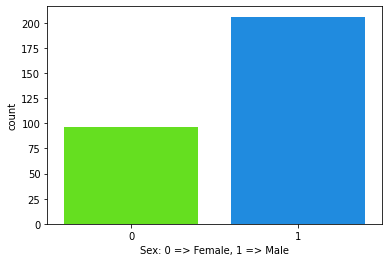

In [8]:
sns.countplot(x='sex', data=data, palette='gist_rainbow')
plt.xlabel("Sex: 0 => Female, 1 => Male")
plt.show()

Decreibe dataset

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Attribute store

In [9]:
attribute = data.columns
attribute

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Split target attribute

In [10]:
attribute=[x for x in attribute if x!='target']
attribute

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

Split train-test

In [11]:
train,test = train_test_split(data,test_size=0.25)
print(len(data))
print(len(train))
print(len(test))

302
226
76


Decision Tree model create

In [12]:
dt = DecisionTreeClassifier(min_samples_split=50, criterion='entropy')

x_train=train[attribute]
y_train=train["target"]

x_test=test[attribute]
y_test=test["target"]

dt=dt.fit(x_train,y_train) #run DT, complete training

Naive Bayes model create

In [13]:
nb = GaussianNB()

x_train=train[attribute]
y_train=train["target"]

x_test=test[attribute]
y_test=test["target"]

nb=nb.fit(x_train,y_train)

Random Forest model create

In [14]:
rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

x_train=train[attribute]
y_train=train["target"]

x_test=test[attribute]
y_test=test["target"]

rf=rf.fit(x_train,y_train)

SVM model create

In [15]:
clf = SVC(kernel='linear')

x_train=train[attribute]
y_train=train["target"]

x_test=test[attribute]
y_test=test["target"]

clf=clf.fit(x_train,y_train)

Logistic Regression model create

In [16]:
lr = LogisticRegression(max_iter=1000)

x_train=train[attribute]
y_train=train["target"]

x_test=test[attribute]
y_test=test["target"]

lr=lr.fit(x_train,y_train)

K Nearest Neighbors model create

In [17]:
knn = KNeighborsClassifier()

x_train=train[attribute]
y_train=train["target"]

x_test=test[attribute]
y_test=test["target"]

knn=knn.fit(x_train,y_train)

Gradient Boosting model create

In [18]:
gb = GradientBoostingClassifier()

x_train=train[attribute]
y_train=train["target"]

x_test=test[attribute]
y_test=test["target"]

gb=gb.fit(x_train,y_train)

Find accuracy of DT

In [19]:
y_pred = dt.predict(x_test) #predicted result of test
y_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1])

In [39]:
score_dt = accuracy_score(y_test, y_pred)*100 #calculate accuracy
print("Accuracy using DT: ", round(score_dt,2), "%")

Accuracy using DT:  77.63 %


Find accuracy of NB

In [45]:
y_pred = nb.predict(x_test) #predicted result of test
y_pred

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1])

In [46]:
score_nb = accuracy_score(y_test, y_pred)*100 #calculate accuracy
print("Accuracy using NB: ", round(score_nb,2), "%")

Accuracy using NB:  81.58 %


Find accuracy of RF

In [47]:
y_pred = rf.predict(x_test) #predicted result of test
y_pred

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1])

In [48]:
score_rf = accuracy_score(y_test, y_pred)*100 #calculate accuracy
print("Accuracy using RF: ", round(score_rf,2), "%")

Accuracy using RF:  80.26 %


Find accuracy of SVM

In [49]:
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1])

In [50]:
score_clf = accuracy_score(y_test, y_pred)*100 #calculate accuracy
print("Accuracy using SVM: ",round(score_clf,2), "%")

Accuracy using SVM:  82.89 %


Find accuracy of LR

In [51]:
y_pred = lr.predict(x_test) #predicted result of test
y_pred

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1])

In [52]:
score_lr = accuracy_score(y_test, y_pred)*100 #calculate accuracy
print("Accuracy using SVM: ",round(score_lr,2), "%")

Accuracy using SVM:  81.58 %


Find accuracy of KNN

In [53]:
y_pred = knn.predict(x_test) #predicted result of test
y_pred

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0])

In [54]:
score_knn = accuracy_score(y_test, y_pred)*100 #calculate accuracy
print("Accuracy using SVM: ",round(score_knn,2), "%")

Accuracy using SVM:  63.16 %


Find accuracy of GB

In [57]:
y_pred = gb.predict(x_test) #predicted result of test
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [58]:
score_gb = accuracy_score(y_test, y_pred)*100 #calculate accuracy
print("Accuracy using SVM: ",round(score_gb,2), "%")

Accuracy using SVM:  77.63 %


Checking height accuracy classifier

In [62]:
best_accuracy = max(score_dt, score_lr, score_knn, score_rf, score_nb, score_gb, score_clf)
if best_accuracy == score_dt:
    print("Decision Tree Gives The Highest Accuracy")
elif best_accuracy == score_rf:
    print("Random Forest Gives The Highest Accuracy")
elif best_accuracy == score_lr:
    print("Logistic Regression Gives The Highest Accuracy")
elif best_accuracy == score_knn:
    print("K Nearest Neighbors Gives The Highest Accuracy")
elif best_accuracy == score_nb:
    print("Naive Bayes Gives The Highest Accuracy")
elif best_accuracy == score_gb:
    print("Gradient Boosting Gives The Highest Accuracy")
else:
    print("SVM Gives The Highest Accuracy")


SVM Gives The Highest Accuracy


# New Section